## Mini Project - IronKaggle

### Project Summary

This project focuses on analyzing house sale prices in King County, including Seattle, using real estate data from May 2014 to May 2015. Working in teams, we perform tasks such as data loading, visualization, and portfolio analysis using Python. The main objective is to identify which features most influence house prices, especially for properties valued at $650,000 and above. Through this project, we aim to improve our Python skills, deepen our understanding of real estate finance, and apply analytical thinking to real-world data.

### Libraries

In [1]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
import xgboost as XGB
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from numpy import hstack

### Exploring the Data set

In [2]:
# Reading the file

houses=pd.read_csv('king_ country_ houses_aa.csv')

In [3]:
houses.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
duplicates_exist = houses.duplicated().any()
print(f"Are there duplicates? {duplicates_exist}")

Are there duplicates? False


In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
houses['id'].nunique()

21436

In [8]:
print(houses.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [9]:
houses['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [10]:
houses['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [11]:
houses['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

After evaluating the data types of each column in the dataset, we reached the following conclusions:

It would be more meaningful to replace the year built column with a new variable representing the age of the house, in order to better assess whether the property is relatively new or not. Similarly, the year renovated column can be simplified into a binary variable indicating whether the house was renovated (1) or not (0).

The columns id and zipcode serve as identifiers and therefore should be treated as categorical variables. The waterfront and newly created reformed columns are boolean, meaning they also fall under categorical data.

In addition, the columns floors, condition, and view have a limited number of unique values and can also be considered categorical variables.

Lastly, the date column should be properly converted to a datetime format to allow for more accurate time-based analysis.

### Correlation between the columns

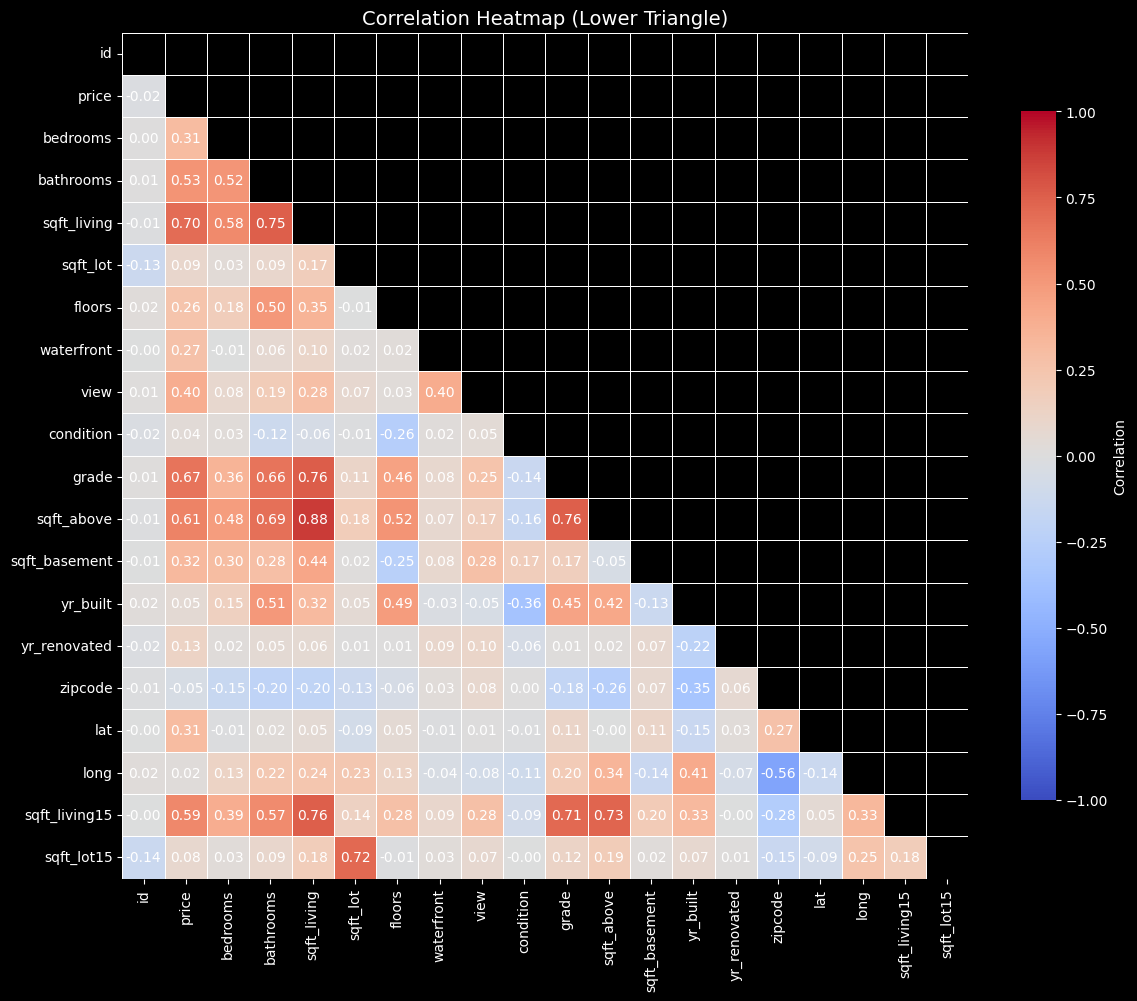

In [12]:
# Select only numeric columns
numeric_houses = houses.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_houses.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure

# Custom colors for dark theme
background_color = '#000000'
text_color = 'white'

plt.style.use('dark_background')

plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1, vmax=1, 
            fmt=".2f", 
            linewidths=0.5, 
            square=True,
            annot_kws={"color": text_color},
            cbar_kws={"label": "Correlation", "shrink": 0.8})

# Style adjustments
plt.title("Correlation Heatmap (Lower Triangle)", color=text_color, fontsize=14)
plt.xticks(color=text_color)
plt.yticks(color=text_color)
plt.gca().set_facecolor(background_color)
plt.gcf().patch.set_facecolor(background_color)

plt.tight_layout()
plt.show()

#### Analysis

To assess potential multicollinearity and redundancy among variables, we plotted a correlation heatmap. Our criterion for removing features was a correlation higher than 90% (|r| > 0.9), as such high correlations may indicate redundancy and negatively impact model performance.

After analyzing the heatmap, we found that none of the variables exhibit correlations above this threshold. Therefore, we decided not to remove any features based solely on correlation. This approach allows us to retain potentially valuable predictors while avoiding unnecessary information loss.

### Feature importance using a ML model

In [13]:
X = houses._get_numeric_data().drop('price', axis=1)
y = houses.price

In [14]:
xgb = XGBRegressor()
xgb.fit(X,y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [15]:
sort_idx = xgb.feature_importances_.argsort()

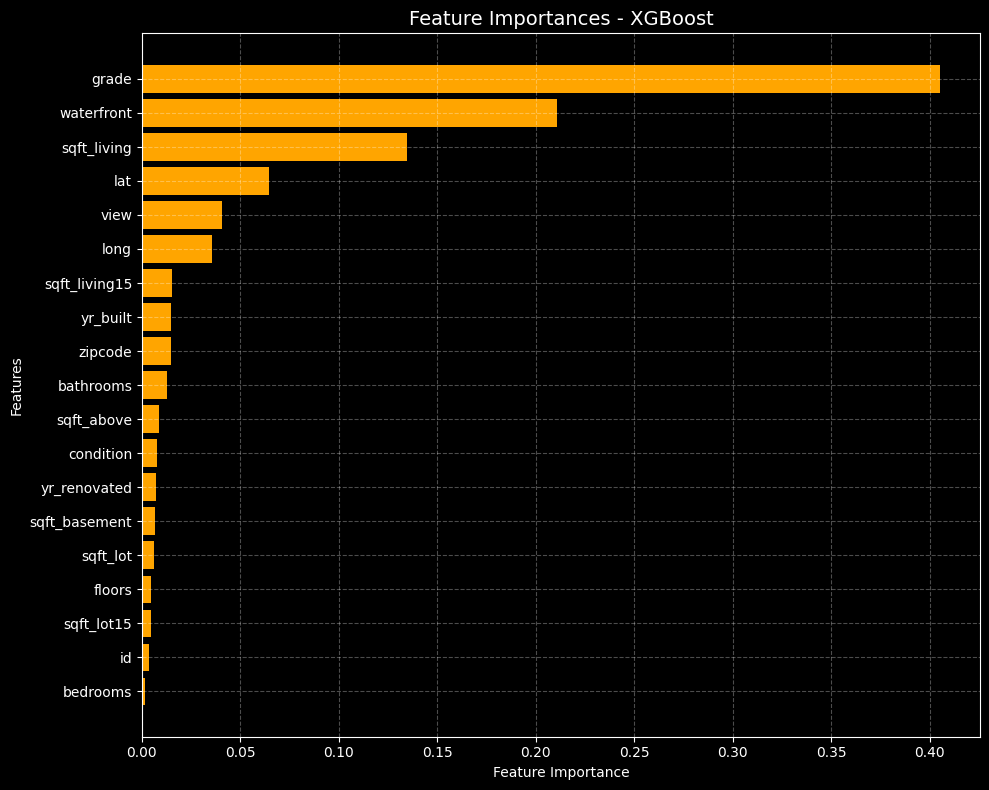

In [16]:
# Custom colors
background_color = '#000000'  # black
bar_color = '#FFA500'         # orange
text_color = 'white'

# Sort features by importance
sorted_idx = xgb.feature_importances_.argsort()

# Plot
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx], color=bar_color)

# Style
plt.xlabel("Feature Importance", color=text_color)
plt.ylabel("Features", color=text_color)
plt.title("Feature Importances - XGBoost", color=text_color, fontsize=14)

# Ticks and spines
plt.xticks(color=text_color)
plt.yticks(color=text_color)
plt.gca().set_facecolor(background_color)
plt.gcf().patch.set_facecolor(background_color)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

The most important feature by far was grade, contributing over 40% of the model’s predictive power.

waterfront and sqft_living followed, with notable importance, but significantly lower than grade.

Geolocation variables like lat and long had some influence, but not dominant.

Features like bathrooms, bedrooms, and sqft_basement had minimal importance.

Overall, the model relied heavily on a small set of categorical and size-related features, suggesting potential underutilization of the dataset.

### Distribution

In [17]:
num_cols = houses.select_dtypes(include=['float64', 'int64']).drop(columns=['id','zipcode','floors','waterfront','view','condition','grade','yr_built','yr_renovated']).columns

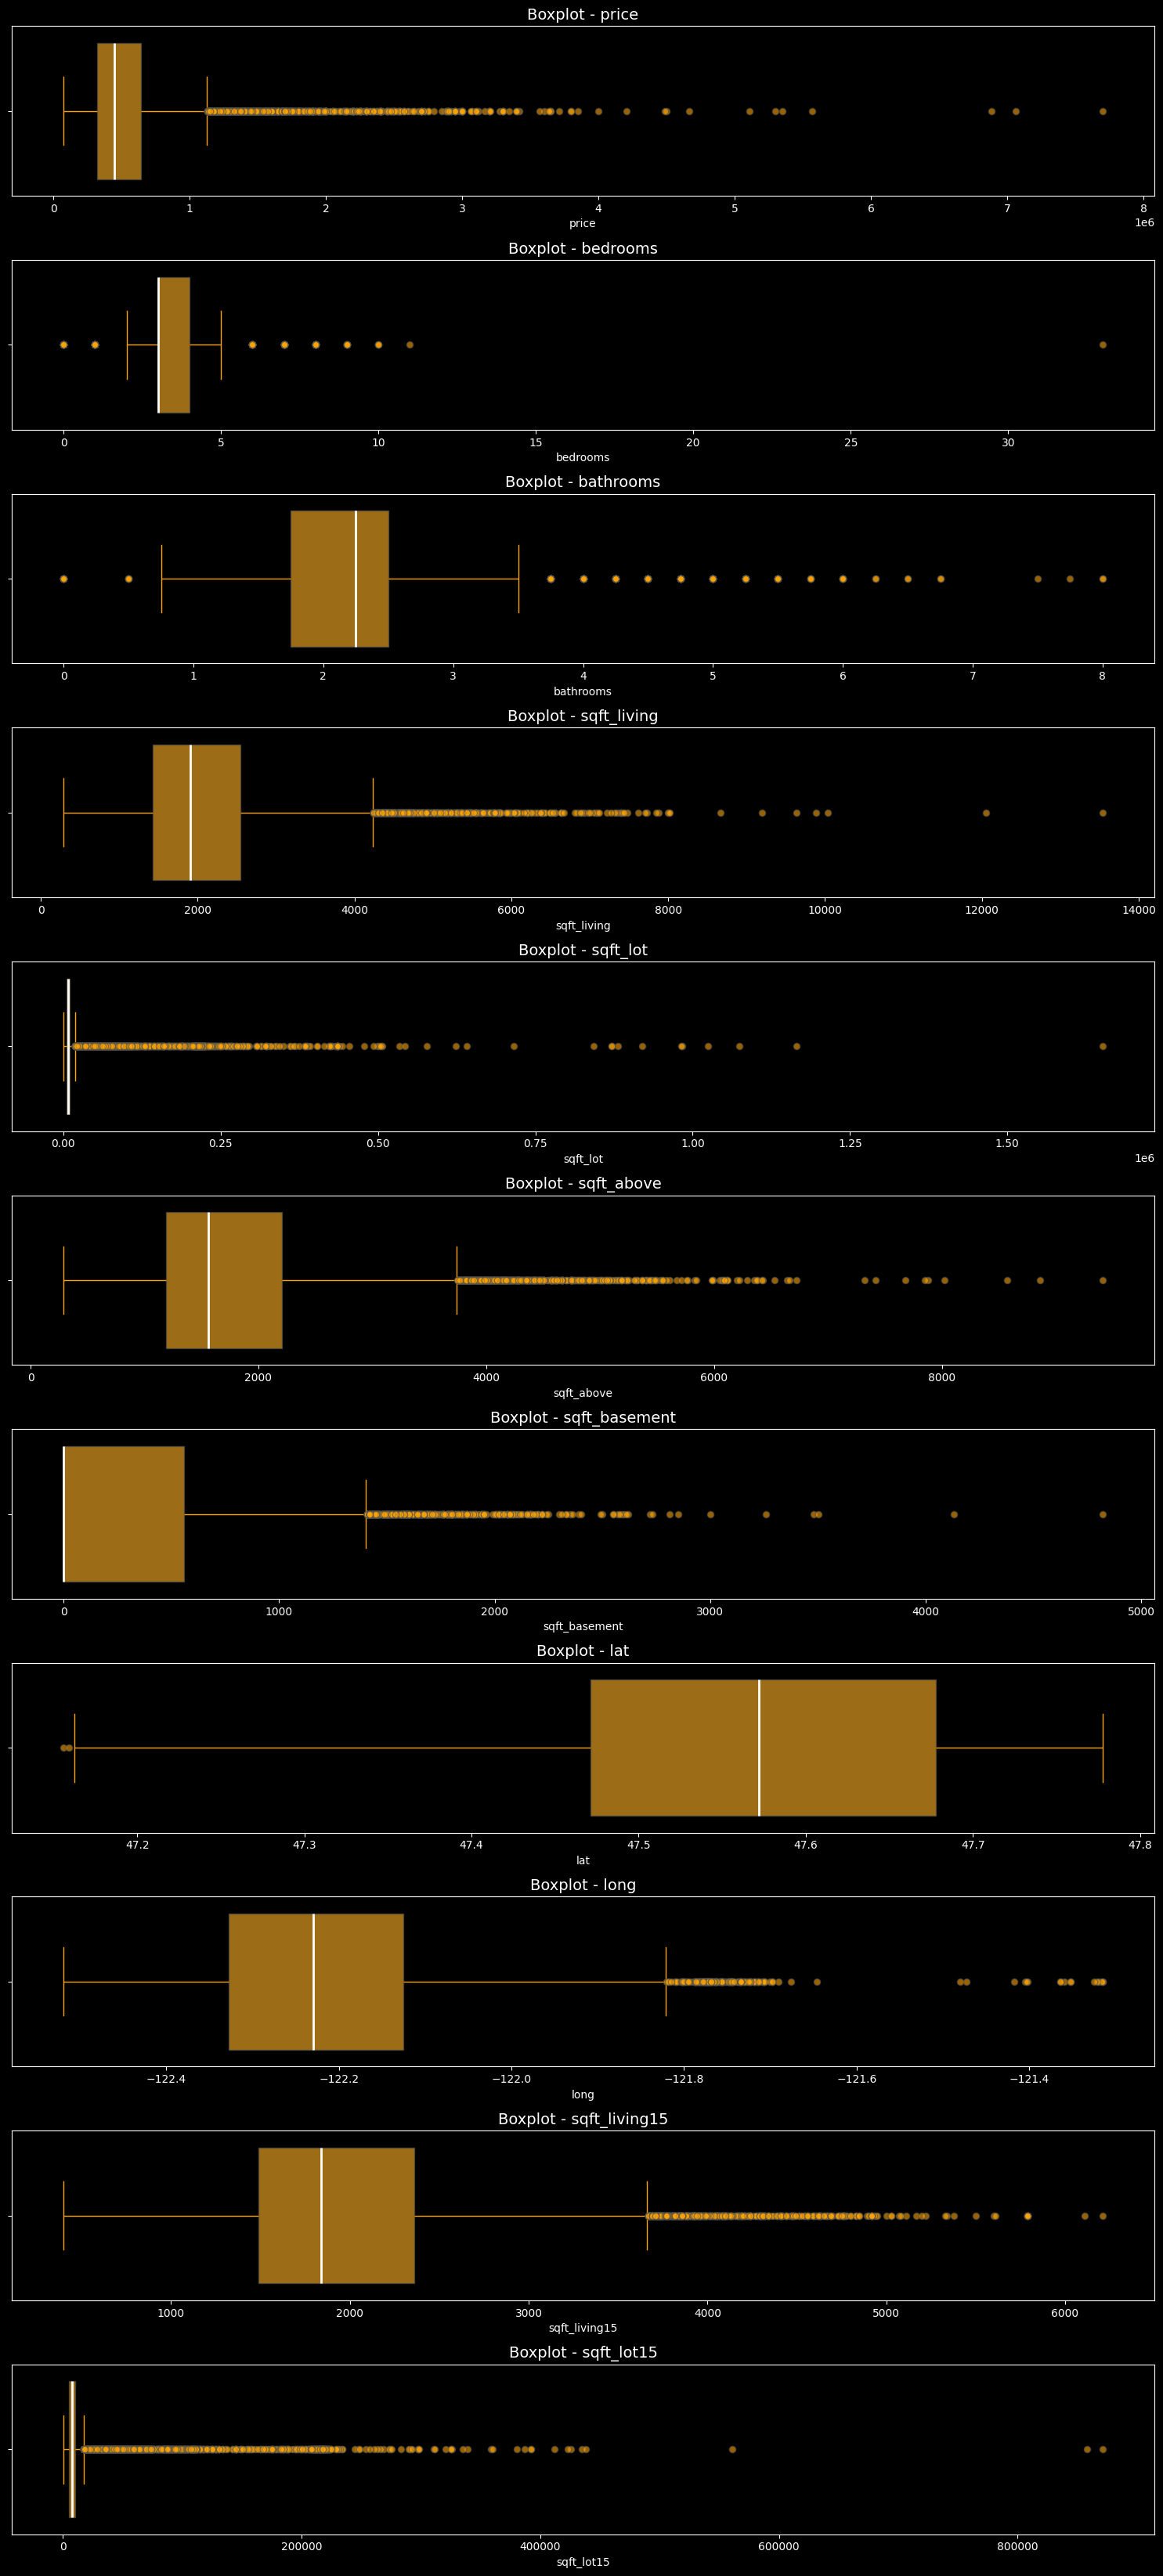

In [ ]:
# Checking outliers

# Custom colors
background_color = '#000000'  # black
accent_color = '#FFA500'      # orange
text_color = 'white'

# Dark style
plt.style.use('dark_background')

plt.figure(figsize=(15, len(num_cols) * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    
    sns.boxplot(x=houses[col], color=accent_color, 
                boxprops=dict(alpha=0.7),
                flierprops=dict(markerfacecolor=accent_color, marker='o', alpha=0.6),
                medianprops=dict(color=text_color, linewidth=2),
                whiskerprops=dict(color=accent_color),
                capprops=dict(color=accent_color))
    
    plt.title(f'Boxplot - {col}', color=text_color, fontsize=14)
    plt.xlabel(col, color=text_color)
    plt.tick_params(colors=text_color)
    plt.grid(False)
    
# Set figure background to black
plt.gcf().patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()

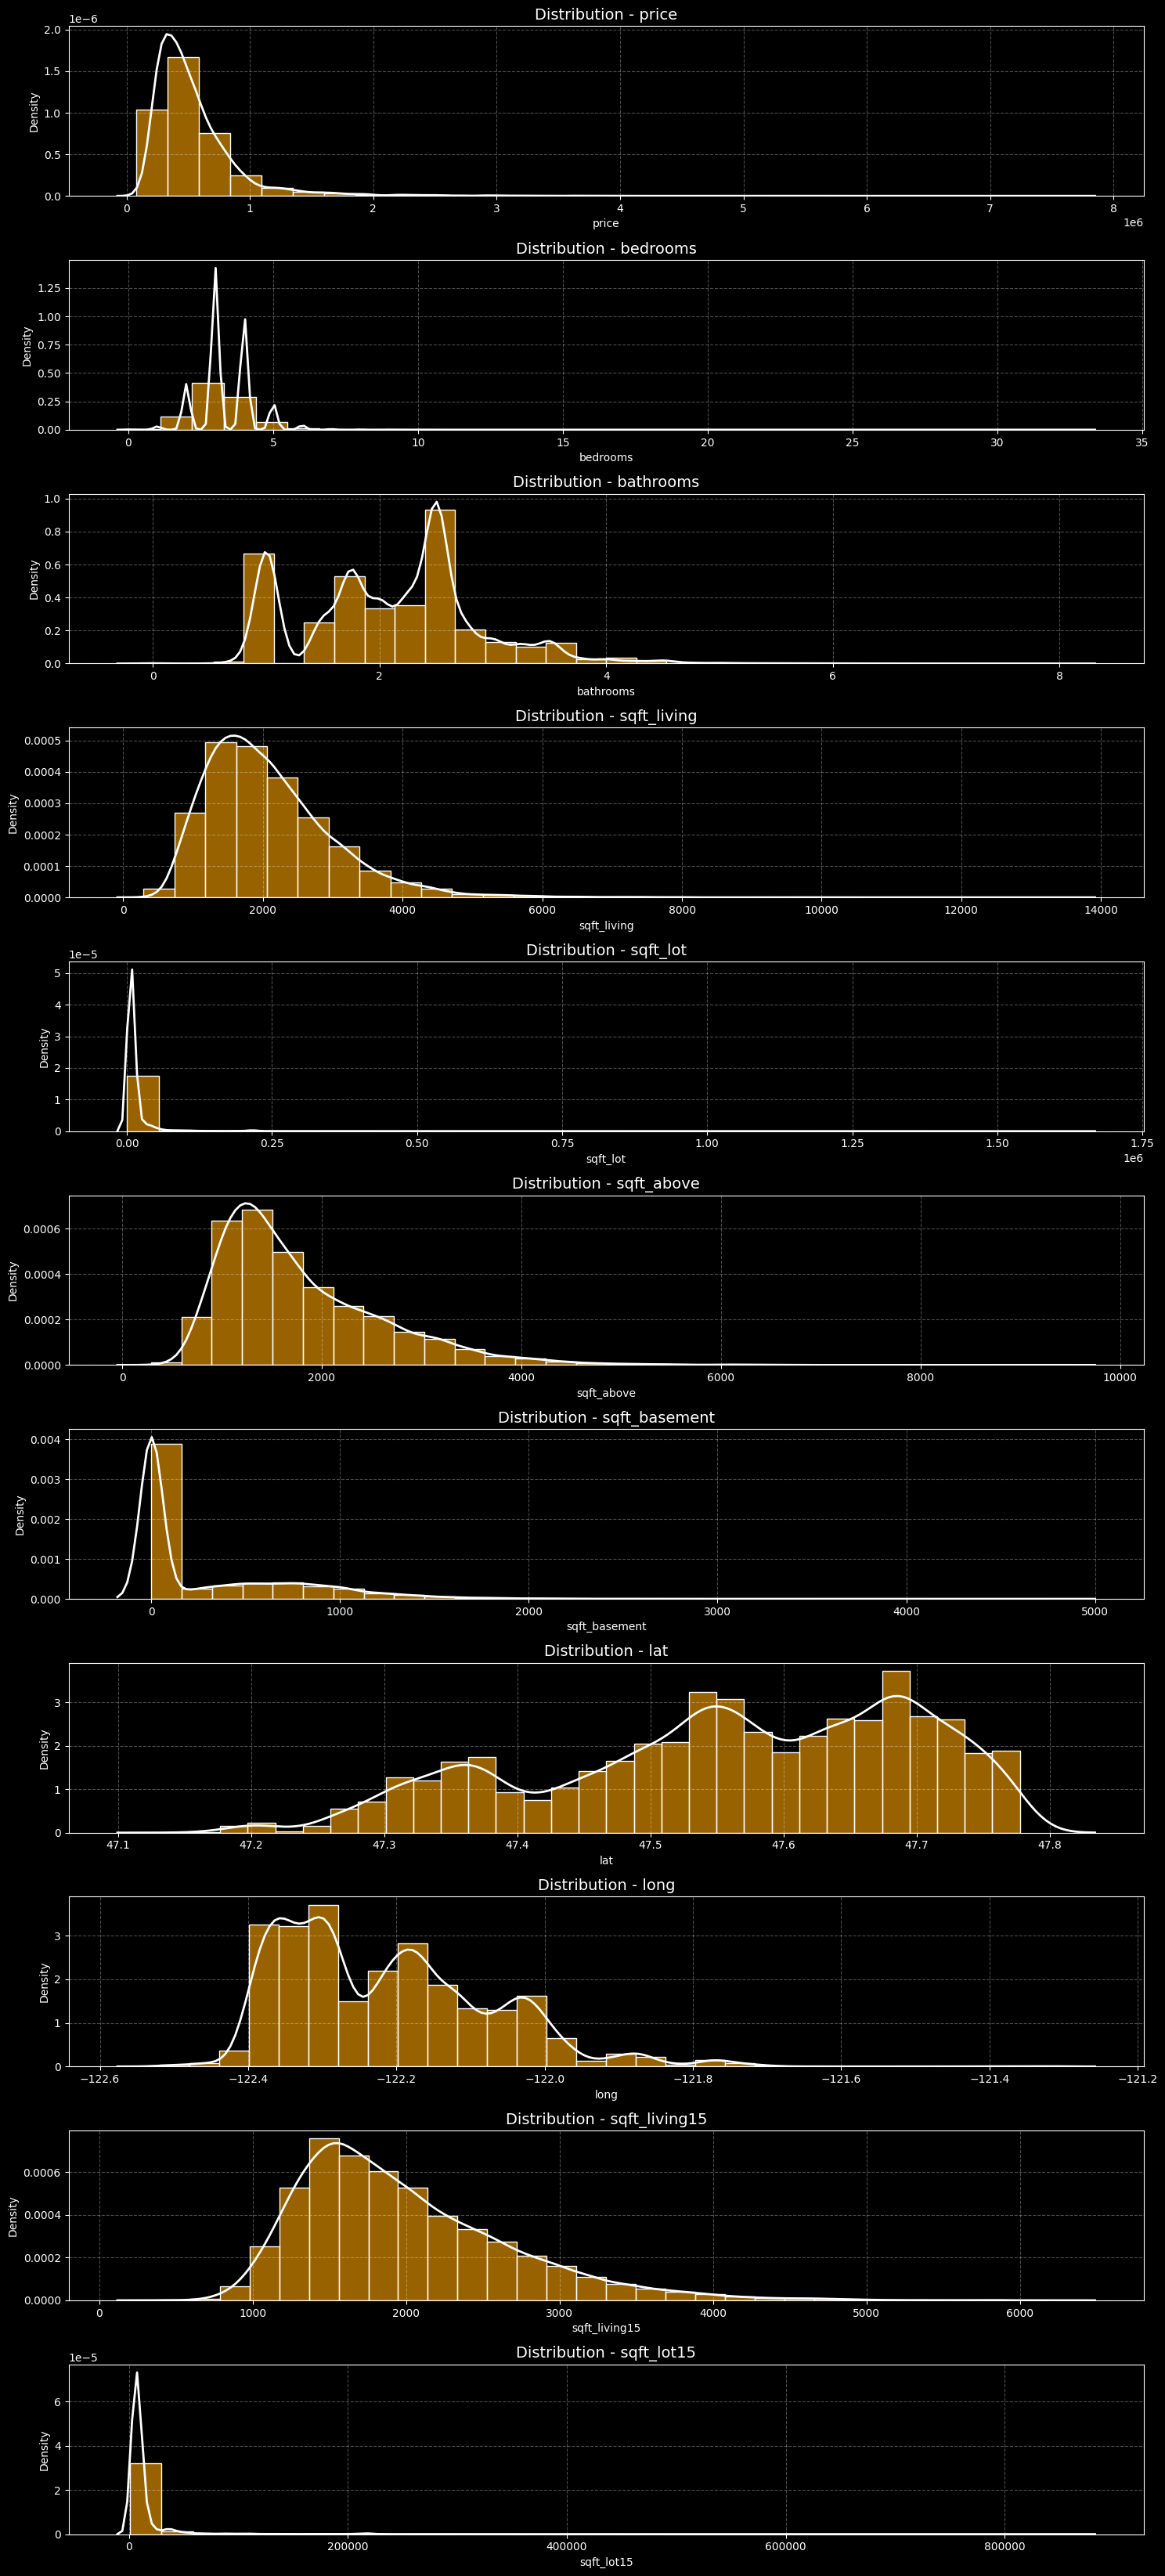

In [20]:
# Custom colors
background_color = '#000000'  # black
accent_color = '#FFA500'      # orange
kde_color = '#FFFFFF'         # white

# Set dark background style
plt.style.use('dark_background')

# Create the figure
plt.figure(figsize=(15, len(num_cols) * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)

    # Drop NaN values to avoid errors
    data = houses[col].dropna()

    # Plot histogram
    sns.histplot(data, bins=30, color=accent_color, stat='density', alpha=0.6)

    # Plot KDE
    if len(data.unique()) > 1:  # KDE requires at least 2 unique values
        sns.kdeplot(data, color=kde_color, linewidth=2)
    else:
        plt.text(0.5, 0.5, 'KDE not available (1 unique value)', 
                 transform=plt.gca().transAxes, 
                 color='white', ha='center', va='center')

    # Style
    plt.title(f'Distribution - {col}', color='white', fontsize=14)
    plt.xlabel(col, color='white')
    plt.ylabel('Density', color='white')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tick_params(colors='white')

# Set figure background
plt.gcf().patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()


After visualizing the dataset through boxplots and distribution plots, we were able to gather several important insights that will help guide our data preprocessing and modeling strategies:

Price: The price distribution is highly right-skewed, with many extreme outliers on the upper end. Applying a log transformation may help normalize the distribution and improve model performance.

Bedrooms and Bathrooms: These features show low variability for most data points, with a few anomalous values (e.g., 33 bedrooms). These outliers should be further investigated or removed. Both variables can be treated as categorical or ordinal depending on the modeling approach.

Square Footage Variables (sqft_living, sqft_above, sqft_basement, sqft_lot, sqft_living15, sqft_lot15): These features are heavily skewed and contain many outliers. Log transformations and outlier capping are recommended. They are continuous variables and should be scaled for most machine learning models.

Latitude and Longitude: These features are more evenly distributed and do not present significant outliers. They provide valuable location-based information and may be used directly or combined into geospatial clusters.

These observations highlight the need for proper data cleaning, outlier handling, feature scaling, and transformation before feeding the data into machine learning algorithms. Such preprocessing steps are essential to ensure better model accuracy and generalization.

### Modeling, prediction and evaluation

In [21]:
# Features
X = houses.drop(columns=['price','date','id'])

# Target
y = houses['price']

We are selecting 80% for training and 20% for the test

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [23]:
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting

# Prediction with testing set
y_test_pred_lr = lr.predict(X_test)

# Prediction with training set
y_train_pred_lr = lr.predict(X_train)

In [24]:
# evaluation
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print('Linear Regression')
print(f"R-squared (train): {r2_train_lr:.4f}")
print(f"R-squared (test): {r2_test_lr:.4f}")

Linear Regression
R-squared (train): 0.6991
R-squared (test): 0.7012


In [25]:
# evaluation
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))

print('Linear Regression')
print(f"RMSE (train): {rmse_train_lr:.4f}")
print(f"RMSE (test): {rmse_test_lr:.4f}")

Linear Regression
RMSE (train): 198272.2430
RMSE (test): 212539.5166


#### Random Forest Regressor

In [26]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Prediction with testing set
y_test_pred_rf = rf.predict(X_test)

# Prediction with training set
y_train_pred_rf = rf.predict(X_train)

In [27]:
# evaluation
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print('Random Forest')
print(f"R-squared (train): {r2_train_rf:.4f}")
print(f"R-squared (test): {r2_test_rf:.4f}")

Random Forest
R-squared (train): 0.9830
R-squared (test): 0.8540


In [28]:
# evaluation
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))

print('Random Forest')
print(f"RMSE (train): {rmse_train_rf:.4f}")
print(f"RMSE (test): {rmse_test_rf:.4f}")

Random Forest
RMSE (train): 47098.1821
RMSE (test): 148582.8994


#### XGBoost Regressor

In [29]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Prediction with testing set
y_test_pred_xgb = xgb.predict(X_test)

# Prediction with training set
y_train_pred_xgb = xgb.predict(X_train)

In [30]:
# evaluation
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print('XGBoost Regressor')
print(f"R-squared (train): {r2_train_xgb:.4f}")
print(f"R-squared (test): {r2_test_xgb:.4f}")

XGBoost Regressor
R-squared (train): 0.9765
R-squared (test): 0.8551


In [31]:
# evaluation
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))

print('XGBoost Regressor')
print(f"RMSE (train): {rmse_train_xgb:.4f}")
print(f"RMSE (test): {rmse_test_xgb:.4f}")

XGBoost Regressor
RMSE (train): 55451.3315
RMSE (test): 147991.9345


#### ADABoost Regressor

In [32]:
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)

# Prediction with testing set
y_test_pred_ada = ada.predict(X_test)

# Prediction with training set
y_train_pred_ada = ada.predict(X_train)

In [33]:
# evaluation
r2_train_ada = r2_score(y_train, y_train_pred_ada)
r2_test_ada = r2_score(y_test, y_test_pred_ada)

print('ADABoost Regressor')
print(f"R-squared (train): {r2_train_ada:.4f}")
print(f"R-squared (test): {r2_test_ada:.4f}")

ADABoost Regressor
R-squared (train): 0.0484
R-squared (test): 0.1096


In [34]:
# evaluation
rmse_test_ada = np.sqrt(mean_squared_error(y_test, y_test_pred_ada))
rmse_train_ada = np.sqrt(mean_squared_error(y_train, y_train_pred_ada))

print('ADABoost Regressor')
print(f"RMSE (train): {rmse_train_ada:.4f}")
print(f"RMSE (test): {rmse_test_ada:.4f}")

ADABoost Regressor
RMSE (train): 352591.2512
RMSE (test): 366896.6347


### Improvements XGBoost Regressor

Implementing improvements that were discussed during the dataset exploration

In [35]:
current_year = datetime.datetime.now().year
houses['age'] = current_year - houses['yr_built']

houses['renovated'] = houses['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
houses=houses.drop(columns=['yr_built','yr_renovated'])

In [37]:
# Convert ID and zipcode to categorical (nominal)
houses['id'] = houses['id'].astype('category')
houses['zipcode'] = houses['zipcode'].astype('category')

# Convert waterfront and renovated (binary) to categorical
houses['waterfront'] = houses['waterfront'].astype('category')
houses['renovated'] = houses['renovated'].astype('category')

# Convert floors, view, condition, and grade to categorical (ordinal by nature)
ordinal_columns = ['floors','view', 'condition']
for col in ordinal_columns:
    houses[col] = houses[col].astype('category')

In [38]:
# Convert date to datetime
houses['date'] = pd.to_datetime(houses['date'])

In [39]:
# Function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# Apply outlier capping on columns
cols_to_cap = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_basement', 'sqft_above', 'age']

for col in cols_to_cap:
    houses = cap_outliers(houses, col)

In [40]:
lat_long=houses[['long','lat']]

# Initialize the scaler
scaler = StandardScaler()

lat_long_scaled = scaler.fit_transform(lat_long)


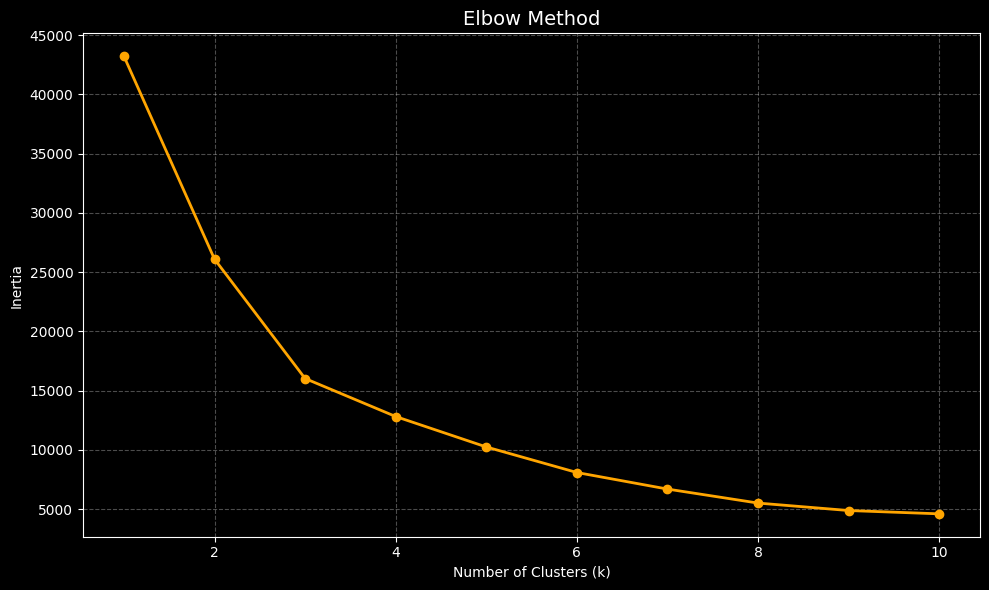

In [41]:
from sklearn.cluster import KMeans

# Your code here:

# Find the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(lat_long_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
# Custom colors
background_color = '#000000'  # black
line_color = '#FFA500'        # orange
text_color = 'white'

# Dark theme
plt.style.use('dark_background')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', color=line_color, markerfacecolor=line_color, linewidth=2)

# Labels and title
plt.xlabel('Number of Clusters (k)', color=text_color)
plt.ylabel('Inertia', color=text_color)
plt.title('Elbow Method', color=text_color, fontsize=14)

# Grid and ticks
plt.grid(True, linestyle='--', alpha=0.3)
plt.tick_params(colors=text_color)

# Set background
plt.gcf().patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(lat_long_scaled)

In [43]:
print(houses.index.equals(lat_long.index))

True


In [44]:
houses['cluster'] = clusters

In [45]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  category      
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  category      
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  zipcode        21613 non-null  category      
 15  lat            2161

In [46]:
# One-hot encode categorical variables (except ID)
houses_encoded = pd.get_dummies(houses, 
                                columns=['waterfront','floors', 'view', 'condition','renovated','cluster'], 
                                drop_first=True)

In [47]:
houses_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  category      
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  int64         
 7   grade          21613 non-null  int64         
 8   sqft_above     21613 non-null  float64       
 9   sqft_basement  21613 non-null  float64       
 10  zipcode        21613 non-null  category      
 11  lat            21613 non-null  float64       
 12  long           21613 non-null  float64       
 13  sqft_living15  21613 non-null  float64       
 14  sqft_lot15     21613 non-null  int64         
 15  age            2161

In [48]:
# Features
X = houses_encoded.drop(columns=['price','date','id','zipcode'])

# Target
y = houses_encoded['price']

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalization

In [50]:
numeric_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
                'sqft_basement','sqft_living15', 'sqft_lot15','grade','lat','long']

scaler = RobustScaler()

# Create copies of the original data to avoid modifying them directly
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling only to the numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [51]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

*Data Preprocessing*

We began by performing several preprocessing steps to prepare the dataset for modeling:

*Feature Engineering:*

Created the age feature from yr_built and the renovated binary feature from yr_renovated.

Converted the date column to a proper datetime object to allow for temporal analysis.

*Handling Categorical Variables:*

Treated condition, grade, and waterfront as ordinal variables.

Used one-hot encoding (with drop_first=True) for nominal variables.

*Outlier Removal:*

Removed outliers in numerical features using the Interquartile Range (IQR) method to reduce skew and improve model performance.

*Geolocation Clustering:*

Applied KMeans clustering to lat and long coordinates to create a new cluster feature.

The optimal number of clusters was chosen using the Elbow Method.

This geographic segmentation adds spatial context to the model.

*Feature Scaling:*

Used RobustScaler to scale numerical features (e.g., square footage, age) to mitigate the influence of remaining outliers.

Target Transformation:

Applied a logarithmic transformation to the target variable price to reduce skewness and stabilize variance.

#### Modeling

*Hyperparameter Tuning*

Employed GridSearchCV with 5-fold cross-validation to find the best hyperparameters.

Optimized the model using the R² score as the evaluation metric.

Used n_jobs=-1 to parallelize the search across all CPU cores.

In [52]:
"""
# Base model
xgb = XGBRegressor(random_state=42)

# Hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',        # metric to optimize
    cv=5,                # number of cross-validation folds
    verbose=2,
    n_jobs=-1            # use all available cores
)

# Run grid search
grid_search.fit(X_train_scaled, y_train_log)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
"""

'\n# Base model\nxgb = XGBRegressor(random_state=42)\n\n# Hyperparameter grid to search\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [3, 6, 10],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'subsample\': [0.7, 1.0],\n    \'colsample_bytree\': [0.7, 1.0]\n}\n\n# Setting up GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=xgb,\n    param_grid=param_grid,\n    scoring=\'r2\',        # metric to optimize\n    cv=5,                # number of cross-validation folds\n    verbose=2,\n    n_jobs=-1            # use all available cores\n)\n\n# Run grid search\ngrid_search.fit(X_train_scaled, y_train_log)\n\n# Best hyperparameters\nprint("Best parameters:", grid_search.best_params_)\n'

In [53]:
xgb_imp = XGBRegressor(colsample_bytree=0.7,learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=1.0,
    random_state=42)
xgb_imp.fit(X_train_scaled, y_train_log)

# Prediction with testing set
y_log_test_pred_xgb = xgb_imp.predict(X_test_scaled)

# Prediction with training set
y_log_train_pred_xgb = xgb_imp.predict(X_train_scaled)

In [54]:
# evaluation
y_train_pred_xgb = np.exp(y_log_train_pred_xgb)
y_test_pred_xgb = np.exp(y_log_test_pred_xgb)

r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print('XGBoost Regressor')
print(f"R-squared (train): {r2_train_xgb:.4f}")
print(f"R-squared (test): {r2_test_xgb:.4f}")

XGBoost Regressor
R-squared (train): 0.9566
R-squared (test): 0.9102


In [55]:
# evaluation
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))

print('XGBoost Regressor')
print(f"RMSE (train): {rmse_train_xgb:.4f}")
print(f"RMSE (test): {rmse_test_xgb:.4f}")

XGBoost Regressor
RMSE (train): 75312.5547
RMSE (test): 116529.2835


Checking the most relevant features

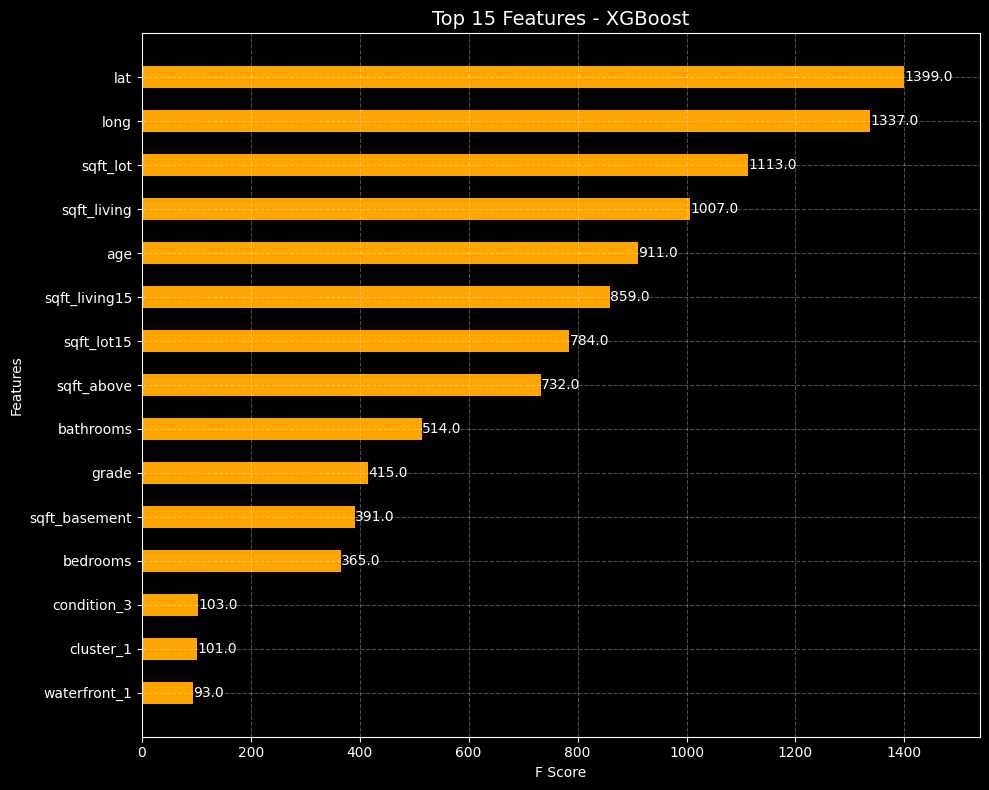

In [56]:
# Custom colors
background_color = '#000000'  # black
bar_color = '#FFA500'         # orange
text_color = 'white'

# Plot the feature importance
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(
    xgb_imp,
    max_num_features=15,
    height=0.5,
    ax=ax,
    color=bar_color
)

# Style adjustments
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Titles and labels
ax.set_title("Top 15 Features - XGBoost", color=text_color, fontsize=14)
ax.set_xlabel("F Score", color=text_color)
ax.set_ylabel("Features", color=text_color)

# Ticks
ax.tick_params(colors=text_color)

# Grid
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

For the XGBoost Regressor model the importance profile became more balanced and nuanced:

lat and long became the top features, indicating that location-based clustering and scaling had a strong positive effect.

Features such as sqft_lot, sqft_living, age, and sqft_living15 gained significant weight.

bathrooms, grade, and bedrooms showed stronger importance than in the earlier model.

The newly added cluster feature also made it into the top 15, demonstrating that spatial clustering added useful information.

The reduced reliance on a single dominant feature (grade) and the higher contribution of engineered features (e.g., age, cluster, lat/long) reflect a more robust and generalized model.

### Bonus

In [57]:
# Split into two groups
low_houses = houses[houses["price"] < 650000].copy()
high_houses = houses[houses["price"] >= 650000].copy()
print(low_houses.shape, high_houses.shape)

(16289, 22) (5324, 22)


In [58]:
# Convert columns in the new datasets
for df in [low_houses, high_houses]:
    df['id'] = df['id'].astype('category')
    df['floors'] = df['floors'].astype('category')
    df['waterfront'] = df['waterfront'].astype('category')
    df['view'] = df['view'].astype('category')
    df['condition'] = df['condition'].astype('category')
    df['zipcode'] = df['zipcode'].astype('category')
    df['renovated'] = df['renovated'].astype('category')# Convert datetime
    df['date'] = df['date'].astype('int64') // 10**9

In [59]:
def train_model(data):
    # Separate features and target
    X = data.drop(columns=["price", "id", "zipcode"])
    y = np.log1p(data["price"])  # log(1 + price)

    # Identify columns
    categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    numerical_cols = X.select_dtypes(include=["number"]).columns.tolist()

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )

    # ----------------------
    # Preprocessing
    # ----------------------

    # Normalize numerical columns
    scaler = RobustScaler()
    X_train_num = scaler.fit_transform(X_train[numerical_cols])
    X_test_num = scaler.transform(X_test[numerical_cols])

    # One-hot encode categorical columns
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[categorical_cols])
    X_test_cat = encoder.transform(X_test[categorical_cols])

    # Concatenate numerical and categorical data
    
    X_train_processed = hstack([X_train_num, X_train_cat])
    X_test_processed = hstack([X_test_num, X_test_cat])

    # ----------------------
    # Model
    # ----------------------
    model = XGBRegressor(
        colsample_bytree=0.7,
        learning_rate=0.05,
        max_depth=4,
        n_estimators=1000,
        subsample=0.8,
        reg_alpha=1,
        reg_lambda=1,
        random_state=42
    )

    # Train with early stopping
    model.fit(
        X_train_processed, y_train,
        eval_set=[(X_test_processed, y_test)],
        verbose=0
    )

    # Predictions
    y_train_pred = np.expm1(model.predict(X_train_processed))
    y_test_pred = np.expm1(model.predict(X_test_processed))
    y_train_orig = np.expm1(y_train)
    y_test_orig = np.expm1(y_test)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_test_pred))
    r2_train = r2_score(y_train_orig, y_train_pred)
    r2_test = r2_score(y_test_orig, y_test_pred)

    return model, rmse_train, rmse_test, r2_test, r2_train

In [60]:
model_low, rmse_low_train, rmse_low_test, r2_low_test, r2_low_train = train_model(low_houses)
model_high, rmse_high_train, rmse_high_test, r2_high_test, r2_high_train = train_model(high_houses)

print("Low-price model R² (train):", r2_low_train)
print("Low-price model R² (test):", r2_low_test)

# Moderate fitting

print("High-price model R² (train):", r2_high_train)
print("High-price model R² (test):", r2_high_test)

# Little overfitting

print("Low-price model RMSE (train):", rmse_low_train)
print("Low-price model RMSE (test):", rmse_low_test)
# Low-price model perfectly fits
print("High-price model RMSE (train):", rmse_high_train)
print("High-price model RMSE (test):", rmse_high_test)

# Little overfit, nothing too crazy!
# Big errors on training set, but expected because prices vary a lot

Low-price model R² (train): 0.8755393573236734
Low-price model R² (test): 0.8241621897143361
High-price model R² (train): 0.9398075552210056
High-price model R² (test): 0.8374866605239756
Low-price model RMSE (train): 44841.7027319588
Low-price model RMSE (test): 53993.63420111294
High-price model RMSE (train): 118527.93118662767
High-price model RMSE (test): 171651.21119096744
